<a href="https://colab.research.google.com/github/Balathanushreddy/leetcodetest/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape # (60000, 28, 28) - batch, height, width, color

(60000, 28, 28)

In [4]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [5]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
y_test[1]

np.uint8(2)

In [9]:
nums = 10
y_train = tf.keras.utils.to_categorical(y_train, nums)
y_test = tf.keras.utils.to_categorical(y_test, nums)

Normalizing and reshaping to

In [6]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test, -1)


#data augmentation - to rotate your images by rotating, skewing to make better predictions

In [10]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [21]:
def show_predictions(model,x,y_true,class_names, n=5):
  preds = model.predict(x[:n])
  pred_classes = np.argmax(preds, axis=1)
  true_classes = np.argmax(y_true[:n], axis=1)
  plt.figure(figsize=(12,3))
  for i in range(n):
    plt.subplot(1,n, i+1)
    plt.imshow(x[i].reshape(28,28), cmap='gray')
    plt.title(f'true: {class_names[true_classes[i]]}, pred: {class_names[pred_classes[i]]}')
  plt.show()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']




In [17]:
model_1 = models.Sequential([layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)),
                             layers.MaxPooling2D((2,2)),
                             layers.Flatten(),
                             layers.Dense(128,activation = 'relu'),
                             layers.Dense(len(class_names), activation='softmax')])
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
log_dir_1 = 'logs/model_1/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback_1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_1)

history_1 = model_1.fit(datagen.flow(X_train,y_train,batch_size=64),
                        validation_data=(X_test,y_test),
                        epochs=10,
                        callbacks=[tensorboard_callback_1])

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.7894 - loss: 0.6727 - val_accuracy: 0.9747 - val_loss: 0.0777
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9517 - loss: 0.1628 - val_accuracy: 0.9824 - val_loss: 0.0560
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9647 - loss: 0.1156 - val_accuracy: 0.9835 - val_loss: 0.0534
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.9707 - loss: 0.0985 - val_accuracy: 0.9811 - val_loss: 0.0574
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9740 - loss: 0.0811 - val_accuracy: 0.9856 - val_loss: 0.0405
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9780 - loss: 0.0723 - val_accuracy: 0.9860 - val_loss: 0.0434
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9795 - loss: 0.0685 - val_accuracy: 0.9883 - val_loss: 0.0349
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9822 - loss: 0.0606 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


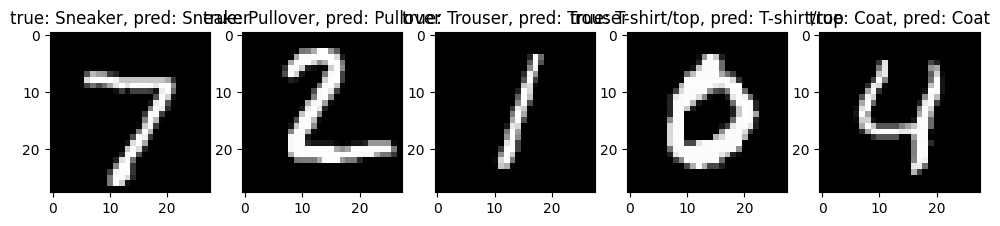

In [22]:
show_predictions(model_1,X_test,y_test,class_names,n=5)